# BAIS:3250 Data Wrangling Final Project Analysis
## Sylvia Jerden 5/9/25

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score

In [2]:
cars_df = pd.read_csv("sjerden_integrated_data_proposal.csv")
cars_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [3]:
cars_df

,brand,model,model_year,mileage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,data_year,Drivetrain,MPG
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,6-Speed A/T,Black,Black,True,Yes,10300,2023,NaN,NaN
1,Hyundai,Palisade SEL,2021,34742,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,True,Yes,38005,2023,NaN,NaN
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,Automatic,Blue,Black,False,No,54598,2023,NaN,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,7-Speed A/T,Black,Black,False,Yes,15500,2023,NaN,NaN
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,False,No,34999,2023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4283,Toyota,Tacoma Base,2023,18383,Gasoline,Automatic,Black,Black/Gun Metal,NaN,NaN,47975,2025,–,18–22
4284,Jeep,Grand Cherokee Laredo,2022,41805,Gasoline,Automatic,Diamond Black Crystal Pearlcoat,Black,NaN,NaN,27789,2025,Four-wheel Drive,18–25
4285,Chevrolet,Silverado 1500 LTZ,2022,38741,Diesel,Automatic,Summit White,Jet Black,NaN,NaN,46995,2025,Four-wheel Drive,20–26
4286,Chevrolet,Silverado 1500 ZR2,2022,76625,Gasoline,10-Speed Automatic,Dark Ash Metallic,Jet Black,NaN,NaN,46880,2025,Four-wheel Drive,14–17


In [4]:
# basic statistics to look at
pd.options.display.float_format = '{:,.0f}'.format
descriptive = cars_df['price'].describe()
descriptive

count       4,288
mean       43,781
std        76,257
min         2,000
25%        17,800
50%        31,000
75%        48,912
max     2,954,083
Name: price, dtype: float64

In [5]:
# removing outliers for fine tuning
cars_df.drop(cars_df[cars_df['price'] >= 250000].index, inplace=True)
cars_df.drop(cars_df[cars_df['model_year'] < 1980].index, inplace=True)
cars_df.drop(cars_df[cars_df['mileage'] > 300000].index, inplace=True)
# removing rows with data missing necessary variables
cars_df.dropna(subset=['price', 'mileage'], inplace=True)

In [6]:
# creating a column if a car is japanese or not. for classification models
japanese_brands = {'Lexus', 'INFINITI', 'Acura', 'Toyota', 'Nissan', 'Honda', 'Subaru', 'Scion', 'Mitsubishi', 'Mazda', 'Suzuki'}
cars_df['Japanese'] = np.where(cars_df['brand'].isin(japanese_brands), True, False)

## Pearson Corrlation Tests

### Correlation between mileage and price

In [7]:
# perform the Pearson correlation test
corr_stat, p_value = pearsonr(cars_df["mileage"], cars_df["price"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")

Pearson Correlation Coefficient: -0.5493
P-value: 0.0000
Reject H0: Significant correlation exists (correlation != 0).


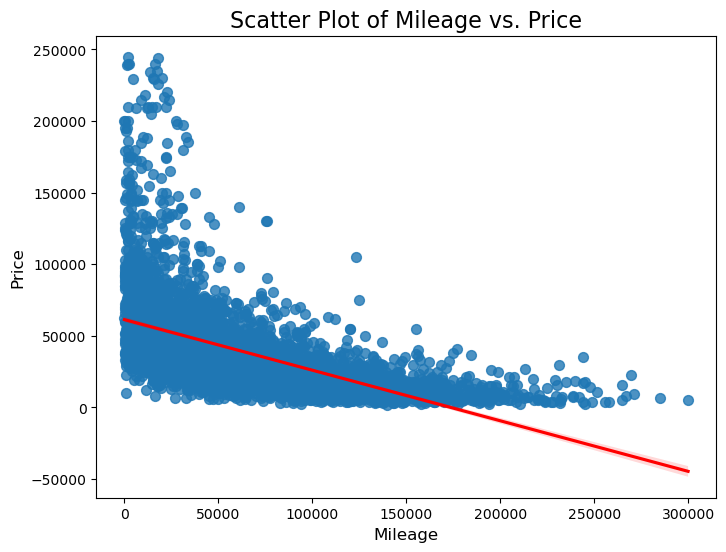

In [8]:
# create the scatter plot with a regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(
    x="mileage", 
    y="price", 
    data=cars_df, 
    scatter_kws={"s": 50},  # adjust size of scatter points
    line_kws={"color": "red"},  # set line color
)

# add axis labels and title
plt.xlabel("Mileage", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Scatter Plot of Mileage vs. Price", fontsize=16)

# display the plot
plt.show()

### Correlation between Model Year and Price

In [9]:
# perform the Pearson correlation test
corr_stat, p_value = pearsonr(cars_df["model_year"], cars_df["price"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")

Pearson Correlation Coefficient: 0.4526
P-value: 0.0000
Reject H0: Significant correlation exists (correlation != 0).


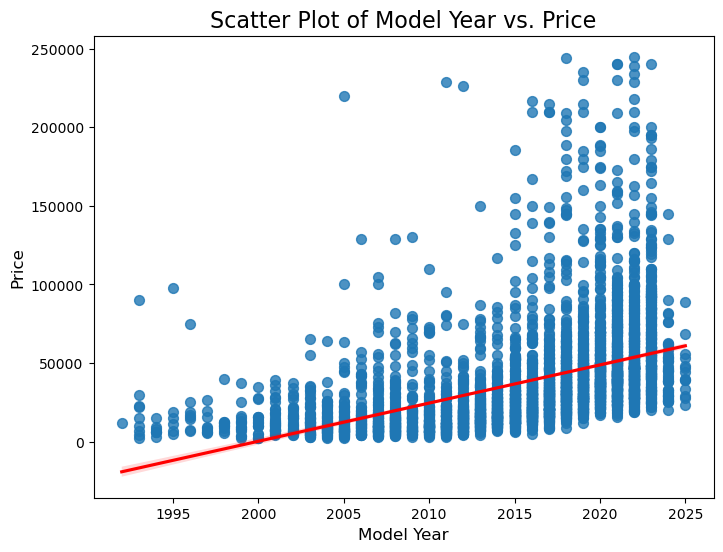

In [10]:
# create the scatter plot with a regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(
    x="model_year", 
    y="price", 
    data=cars_df, 
    scatter_kws={"s": 50},  # adjust size of scatter points
    line_kws={"color": "red"},  # set line color
)

# add axis labels and title
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Scatter Plot of Model Year vs. Price", fontsize=16)

# display the plot
plt.show()

# Machine Learning
## Regression
### Linear Regression

In [26]:
# creating a linear regression with the target varaible mpg on an 80/20 split of data
# i use poisson regressor instead of linear to prevent predictions of prices < 0
car_lin = PoissonRegressor()
X = cars_df[['mileage', 'model_year', 'Japanese']]
y = cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
car_lin.fit(X_train, y_train)
# producing the linear regressions r^2 score
print(f"R^2 Score: {car_lin.score(X_test, y_test)}")
print(car_lin.coef_)

R^2 Score: 0.4788612552846919
[-1.21736712e-05  3.37303955e-04 -3.02881941e-01]


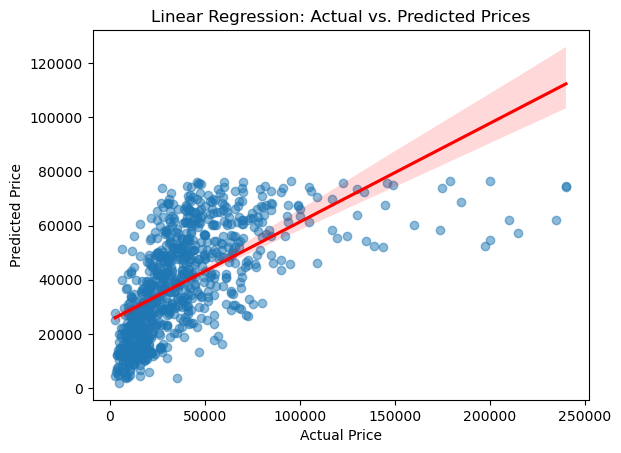

In [13]:
# Predict the prices for the test data
y_pred = car_lin.predict(X_test)

# Create a scatterplot with regression line
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs. Predicted Prices")
plt.show()

### Ridge

In [22]:
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)  # Preserve feature names
ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)
r2_ridge = ridge.score(X_test_df, y_test)  # R² score
print(f"R² Score (Ridge): {r2_ridge:.2f}")

R² Score (Ridge): 0.33


### Lasso

In [24]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
r2_lasso = lasso.score(X_test_df, y_test) 
print(f"R² Score (Lasso): {r2_lasso:.2f}")

R² Score (Lasso): 0.33


## Classification
### Logistic Regression

In [16]:
car_log = LogisticRegression()
X2 = cars_df[['mileage', 'price']]
y2 = cars_df['Japanese']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
car_log.fit(X2_train, y2_train)
# producing the linear regressions r^2 score
print(f"R^2 Score: {car_log.score(X2_test, y2_test)}")
print(car_log.coef_)

R^2 Score: 0.7886658795749705
[[-7.86542823e-07 -2.55116670e-05]]


In [17]:
true_count = cars_df['Japanese'].sum()
print(f"Number of Japanese cars: {true_count}")

Number of Japanese cars: 913


Text(0.5, 1.0, 'Car Price vs Mileage (Colored by Japanese Brand)')

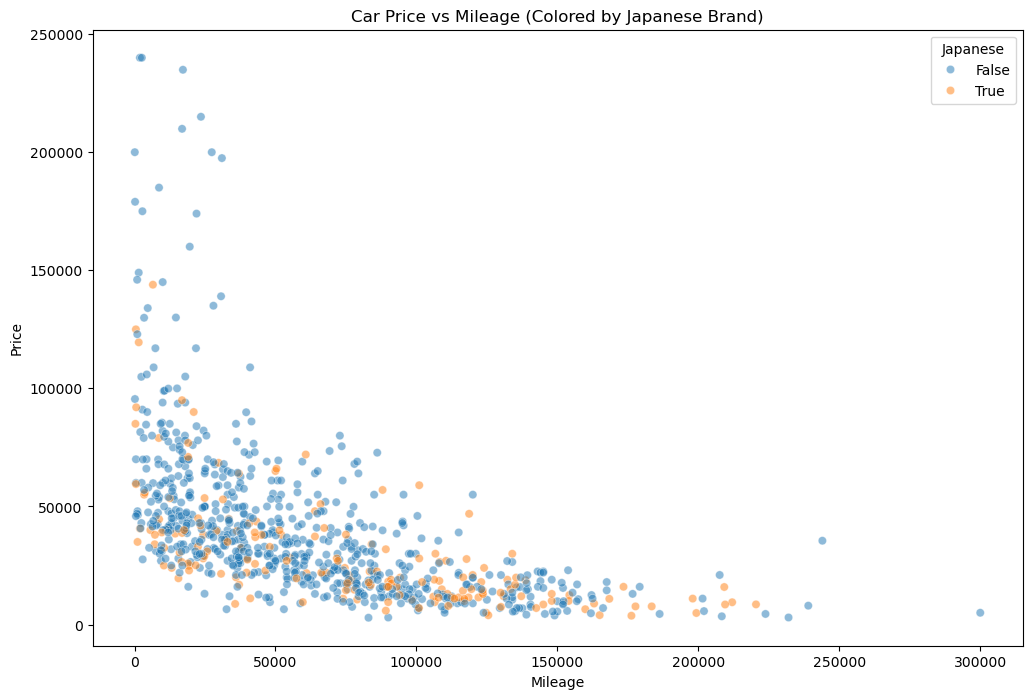

In [18]:
plt.figure(figsize=(12, 8))  # Adjust figure size for better visibility
sns.scatterplot(x=X2_test['mileage'], y=X2_test['price'], hue=y2_test, alpha=0.5)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Car Price vs Mileage (Colored by Japanese Brand)")

### K-Nearest Neighbor Test

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train, y2_train)
y_pred = knn.predict(X2_test)

accuracy_knn = accuracy_score(y2_test, y_pred)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.7390791027154664


### SVM Test

In [20]:
svm_model = SVC(kernel='linear')  # You can experiment with 'rbf' or 'poly' kernels
svm_model.fit(X2_train, y2_train)
y_pred_svm = svm_model.predict(X2_test)

accuracy = accuracy_score(y2_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy}")

SVM Accuracy: 0.7863046044864227


### Decision Tree

In [21]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X2_train, y2_train)
y_pred_tree = tree_model.predict(X2_test)

accuracy_tree = accuracy_score(y2_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

Decision Tree Accuracy: 0.680047225501771
